In [43]:
#Code to generate parameters for Gillespie simulations - positive regulation

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Estimating parameters


## $k_{on}$

Data source:

- Larsson et al, 2019
- Ramsköld et al, 2024
- Halpern et al, 2015


In [45]:
ramskold_2024_fib_1 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/ramskold_mousefibroblasts_datahalf1_kinetic_estimates.xlsx")
ramskold_2024_fib_1 = ramskold_2024_fib_1[(ramskold_2024_fib_1['ML_no_error']) & (ramskold_2024_fib_1['Lookup_successful__if_false_then_ML_is_likely_to_produce_nonsense_output'])]
k_on = ramskold_2024_fib_1['ML_derived_burst_frequency_per_hour'].dropna()
print("Fib 1")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_ramskold_fib_1 = k_on

Fib 1
Mean: 1.0104814368573711
1st Quartile: 0.07373985735984104
Median: 0.7420735949493393
3rd Quartile: 1.676419183125378
Standard Deviation: 1.124659578479667
Minimum: 0.0001312710308114655
Maximum: 36.49180849756235


In [46]:
ramskold_2024_fib_2 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/ramskold_mousefibroblasts_datahalf2_kinetic_estimates.xlsx")
ramskold_2024_fib_2 = ramskold_2024_fib_2[(ramskold_2024_fib_2['ML_no_error']) & (ramskold_2024_fib_2['Lookup_successful__if_false_then_ML_is_likely_to_produce_nonsense_output'])]
k_on = ramskold_2024_fib_2['ML_derived_burst_frequency_per_hour'].dropna()
print("Fib 2")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_ramskold_fib_2 = k_on

Fib 2
Mean: 1.0321422879138198
1st Quartile: 0.06929247706444529
Median: 0.75253835705696
3rd Quartile: 1.679605167048039
Standard Deviation: 1.2538736572290723
Minimum: 0.0001371805965726848
Maximum: 33.60957781615014


In [47]:
ramskold_2024_k562_1 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/ramskold_K562_datahalf1_kinetic_estimates.xlsx")
ramskold_2024_k562_1 = ramskold_2024_k562_1[(ramskold_2024_k562_1['ML_no_error']) & (ramskold_2024_k562_1['Lookup_successful__if_false_then_ML_is_likely_to_produce_nonsense_output'])]
k_on = ramskold_2024_k562_1['ML_derived_burst_frequency_per_hour'].dropna()
print("c562 1")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_ramskold_c562_1 = k_on

c562 1
Mean: 1.7486626902709819
1st Quartile: 0.6212398494196723
Median: 1.2725722649316267
3rd Quartile: 2.186065373359897
Standard Deviation: 2.775902971643924
Minimum: 0.001105789532173987
Maximum: 39.0930513048507


In [49]:
ramskold_2024_k562_2 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/ramskold_K562_datahalf2_kinetic_estimates.xlsx")
ramskold_2024_k562_2 = ramskold_2024_k562_2[(ramskold_2024_k562_2['ML_no_error']) & (ramskold_2024_k562_2['Lookup_successful__if_false_then_ML_is_likely_to_produce_nonsense_output'])]
k_on = ramskold_2024_k562_2['ML_derived_burst_frequency_per_hour'].dropna()
print("c562 2")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_ramskold_c562_2 = k_on

c562 2
Mean: 1.713047274609331
1st Quartile: 0.5984529084432129
Median: 1.220179197632962
3rd Quartile: 2.094331987623872
Standard Deviation: 3.1309180798434992
Minimum: 0.001106449070156549
Maximum: 122.857627756417


In [ ]:
plt.hist(k_on_ramskold_c562_2[k_on_ramskold_c562_2 < 5])
plt.show()

In [10]:
# Limits used in larsson_2019_supp_table_3 for sanity filter
# kon = np.array(est_params)[:,0]
# koff = np.array(est_params)[:,1]
# ksyn = np.array(est_params)[:,2]
# which_kon = ~(kon < 2*1e-3)*~(kon > 1e3 - 1)
# which_koff = ~(koff < 2*1e-3)*~(koff > 1e3 - 1)
# which_burst = ksyn/koff > 1
# which_ksyn = ksyn > 1
# which = which_burst*which_koff*which_kon*which_ksyn


In [50]:
def get_decay_es(index):
    DR_ES = pd.read_csv('/home/mzo5929/Keerthana/grnInference/parameter_data/larsson_slam_seq_data.csv', sep=';')
    DR_ES.index = DR_ES['Name']

    DR_ES = DR_ES[~DR_ES.index.duplicated(keep='first')]

    DR_ES = DR_ES.dropna(how='any')

    DR_ES['decay'] = np.log(2)/DR_ES['Half-life (h)']


    DR_ES_scRNA = DR_ES.reindex(index)
    decay_ES = DR_ES_scRNA['decay']
    decay_ES = decay_ES.replace([np.inf, 0], np.nan).dropna()
    decay_ES = decay_ES[~decay_ES.index.duplicated(keep='first')]
    decay_ES = decay_ES[decay_ES > 0]
    decay_ES = decay_ES.dropna()
    return decay_ES

In [51]:
#Supplementary Table 3 Transcriptional burst kinetics inferred in Embryonic stem cells for C57Bl6 and CAST alleles
larsson_2019_supp_table_3 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/larsson2019genomic_supp_table_3.xlsx", sheet_name=None)
larsson_2019_supp_table_3_c57b16 = larsson_2019_supp_table_3['C57']
larsson_2019_supp_table_3_c57b16.set_index('Gene', inplace=True)
larsson_2019_supp_table_3_c57b16['kOn'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['kOn'], errors='coerce')
larsson_2019_supp_table_3_c57b16['kOff'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['kOff'], errors='coerce')
larsson_2019_supp_table_3_c57b16['ksyn'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['ksyn'], errors='coerce')
k_on_relative = larsson_2019_supp_table_3_c57b16[(larsson_2019_supp_table_3_c57b16['kOn'] > 2*1e-3) & (larsson_2019_supp_table_3_c57b16['kOn'] < (1e3 - 1))]['kOn'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_3_c57b16.index)
k_on = (k_on_relative*decay_ES).dropna()
print("C57 ALLELE")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_larsson_ES_c57b16 = k_on

larsson_2019_supp_table_3_cast = larsson_2019_supp_table_3['CAST']
larsson_2019_supp_table_3_cast.set_index('Gene', inplace=True)
larsson_2019_supp_table_3_cast['kOn'] = pd.to_numeric(larsson_2019_supp_table_3_cast['kOn'], errors='coerce')
larsson_2019_supp_table_3_cast['kOff'] = pd.to_numeric(larsson_2019_supp_table_3_cast['kOff'], errors='coerce')
larsson_2019_supp_table_3_cast['ksyn'] = pd.to_numeric(larsson_2019_supp_table_3_cast['ksyn'], errors='coerce')
k_on_relative = larsson_2019_supp_table_3_cast[(larsson_2019_supp_table_3_cast['kOn'] > 2*1e-3) & (larsson_2019_supp_table_3_cast['kOn'] < (1e3 - 1))]['kOn'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_3_c57b16.index)
k_on = (k_on_relative*decay_ES).dropna()

print("CAST ALLELE")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_larsson_ES_cast = k_on

C57 ALLELE
Mean: 0.20596863397509274
1st Quartile: 0.06716779331127506
Median: 0.13085365370637642
3rd Quartile: 0.22200547915191213
Standard Deviation: 1.843503182642751
Minimum: 0.0005711495551356789
Maximum: 109.5328354708063
CAST ALLELE
Mean: 0.1667408067312676
1st Quartile: 0.06632150448098165
Median: 0.12882434192543946
3rd Quartile: 0.21441689188305957
Standard Deviation: 0.18584514357262674
Minimum: 0.00038916208147576876
Maximum: 6.265822048945427


In [52]:
# Supplementary Table 1 Transcriptional burst kinetics inferred in Fibroblasts for C57Bl6 and CAST alleles. 

larsson_2019_supp_table_1 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/larsson2019genomic_supp_table_1.xlsx", sheet_name=None)
larsson_2019_supp_table_1_c57b16 = larsson_2019_supp_table_1['C57']
larsson_2019_supp_table_1_c57b16.index = larsson_2019_supp_table_1_c57b16['Gene']
larsson_2019_supp_table_1_c57b16['kOn'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['kOn'], errors='coerce')
larsson_2019_supp_table_1_c57b16['kOff'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['Koff'], errors='coerce')
larsson_2019_supp_table_1_c57b16['ksyn'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['ksyn'], errors='coerce')
k_on_relative = larsson_2019_supp_table_1_c57b16[(larsson_2019_supp_table_1_c57b16['kOn'] > 2*1e-3) & (larsson_2019_supp_table_1_c57b16['kOn'] < (1e3 - 1))]['kOn'].dropna()


decay_ES = get_decay_es(larsson_2019_supp_table_1_c57b16.index)
k_on = (k_on_relative*decay_ES).dropna()
print("C57 ALLELE")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_larsson_Fib_c57b16 = k_on

larsson_2019_supp_table_1_cast = larsson_2019_supp_table_1['CAST']
larsson_2019_supp_table_1_cast.index = larsson_2019_supp_table_1_cast['Gene']
larsson_2019_supp_table_1_cast['kOn'] = pd.to_numeric(larsson_2019_supp_table_1_cast['kOn'], errors='coerce')
larsson_2019_supp_table_1_cast['kOff'] = pd.to_numeric(larsson_2019_supp_table_1_cast['Koff'], errors='coerce')
larsson_2019_supp_table_1_cast['ksyn'] = pd.to_numeric(larsson_2019_supp_table_1_cast['ksyn'], errors='coerce')
k_on_relative = larsson_2019_supp_table_1_cast[(larsson_2019_supp_table_1_cast['kOn'] > 2*1e-3) & (larsson_2019_supp_table_1_cast['kOn'] < (1e3 - 1))]['kOn'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_1_cast.index)
k_on = (k_on_relative*decay_ES).dropna()
print("CAST ALLELE")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_larsson_Fib_cast = k_on

C57 ALLELE
Mean: 0.1335304672296609
1st Quartile: 0.06036726742651073
Median: 0.10997276867126132
3rd Quartile: 0.17468754222604926
Standard Deviation: 0.11240275328442897
Minimum: 0.0001946294691895875
Maximum: 1.281125808162066
CAST ALLELE
Mean: 0.13093967842275828
1st Quartile: 0.05771800391528113
Median: 0.1077028926581953
3rd Quartile: 0.17257307127448016
Standard Deviation: 0.10953479712417086
Minimum: 0.00028271660005847087
Maximum: 1.395213667114097


In [53]:
halpern = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/halpern2015bursty_supp_table.xlsx")
halpern = halpern.dropna()
k_on = halpern['Kon(1/hr)']
print("Halpern")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_halpern = k_on

Halpern
Mean: 0.35886363636363644
1st Quartile: 0.06825
Median: 0.118
3rd Quartile: 0.595
Standard Deviation: 0.42864796250253634
Minimum: 0.001
Maximum: 1.32


In [54]:
#Merge the all the lists to calculate the combined stats
k_on = pd.concat([k_on_halpern, k_on_ramskold_fib_2, k_on_ramskold_c562_2, k_on_ramskold_c562_1, k_on_ramskold_fib_1, k_on_larsson_Fib_cast, k_on_larsson_Fib_c57b16, k_on_larsson_ES_cast, k_on_larsson_ES_c57b16], ignore_index=True)
print("Mean:", k_on.mean())
print("5th Percentile:", k_on.quantile(0.05))
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("95th Percentile:", k_on.quantile(0.95))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())

Mean: 1.0391029410088914
5th Percentile: 0.01100183312142585
1st Quartile: 0.09705559377128055
Median: 0.5474154439351583
3rd Quartile: 1.561003938486209
95th Percentile: 3.17445158980805
Standard Deviation: 1.9415568108366754
Minimum: 0.0001312710308114655
Maximum: 122.857627756417


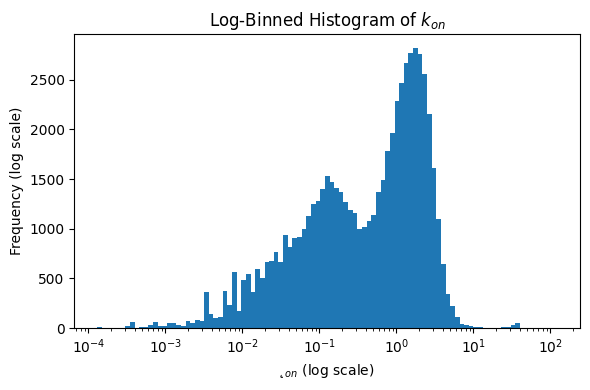

In [56]:
values = k_on
values = values[values > 0]

# Define log-spaced bins
n_bins = 100
min_val = values.min()
max_val = values.max()
log_bins = np.logspace(np.log10(min_val), np.log10(max_val), n_bins)

# Plot
plt.figure(figsize=(6, 4))
plt.hist(values, bins=log_bins)
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r"$\k_{on}$ (log scale)")
plt.ylabel("Frequency (log scale)")
plt.title(r"Log-Binned Histogram of $k_{on}$")
plt.tight_layout()
plt.show()

# $\frac{k_{on}}{k_{off}}$


In [2]:
halpern = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/halpern2015bursty_supp_table.xlsx")
halpern = halpern.dropna()
halpern
k_on_off_ratio = halpern['Kon(1/hr)']/(halpern['Koff(1/hr)'] + halpern['Kon(1/hr)'])
print("Halpern")
print("Mean:", k_on_off_ratio.mean())
print("1st Quartile:", k_on_off_ratio.quantile(0.25))
print("Median:", k_on_off_ratio.median())
print("3rd Quartile:", k_on_off_ratio.quantile(0.75))
print("Standard Deviation:", k_on_off_ratio.std())
print("Minimum:", k_on_off_ratio.min())
print("Maximum:", k_on_off_ratio.max())
k_on_off_ratio_halpern = k_on_off_ratio

Halpern
Mean: 0.43103035877105084
1st Quartile: 0.092786830709607
Median: 0.447810650887574
3rd Quartile: 0.7077114237064536
Standard Deviation: 0.3113556102945432
Minimum: 0.022670025188916875
Maximum: 0.8634146341463415


In [3]:
# # Supplementary Table 1 Transcriptional burst kinetics inferred in Fibroblasts for C57Bl6 and CAST alleles. 

larsson_2019_supp_table_1 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/larsson2019genomic_supp_table_1.xlsx", sheet_name=None)
larsson_2019_supp_table_1_c57b16 = larsson_2019_supp_table_1['C57']
larsson_2019_supp_table_1_c57b16.index = larsson_2019_supp_table_1_c57b16['Gene']
larsson_2019_supp_table_1_c57b16['kOn'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['kOn'], errors='coerce')
larsson_2019_supp_table_1_c57b16['kOff'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['Koff'], errors='coerce')
larsson_2019_supp_table_1_c57b16['ksyn'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['ksyn'], errors='coerce')
larsson_2019_supp_table_1_c57b16 = larsson_2019_supp_table_1_c57b16[(larsson_2019_supp_table_1_c57b16['kOff'] > 2*1e-3) & (larsson_2019_supp_table_1_c57b16['kOff'] < (1e3 - 1))]
larsson_2019_supp_table_1_c57b16 = larsson_2019_supp_table_1_c57b16[(larsson_2019_supp_table_1_c57b16['kOn'] > 2*1e-3) & (larsson_2019_supp_table_1_c57b16['kOn'] < (1e3 - 1))]
larsson_2019_supp_table_1_c57b16['on_off_ratio'] = larsson_2019_supp_table_1_c57b16['kOn']/(larsson_2019_supp_table_1_c57b16['kOn'] + larsson_2019_supp_table_1_c57b16['kOff'])
k_on_off_ratio = larsson_2019_supp_table_1_c57b16['on_off_ratio'].dropna()
print("Mean:", k_on_off_ratio.mean())
print("1st Quartile:", k_on_off_ratio.quantile(0.25))
print("Median:", k_on_off_ratio.median())
print("3rd Quartile:", k_on_off_ratio.quantile(0.75))
print("Standard Deviation:", k_on_off_ratio.std())
print("Minimum:", k_on_off_ratio.min())
print("Maximum:", k_on_off_ratio.max())
k_on_off_ratio_larsson_Fib_c57b16 = k_on_off_ratio

# k_off_relative = larsson_2019_supp_table_1_c57b16[(larsson_2019_supp_table_1_c57b16['kOff'] > 2*1e-3) & (larsson_2019_supp_table_1_c57b16['kOff'] < (1e3 - 1))]['kOff'].dropna()
# decay_ES = get_decay_es(larsson_2019_supp_table_1_c57b16.index)
# k_off = (k_off_relative*decay_ES).dropna()
# print("C57 ALLELE")
# print("Mean:", k_off.mean())
# print("1st Quartile:", k_off.quantile(0.25))
# print("Median:", k_off.median())
# print("3rd Quartile:", k_off.quantile(0.75))
# print("Standard Deviation:", k_off.std())
# print("Minimum:", k_off.min())
# print("Maximum:", k_off.max())
# k_off_larsson_Fib_c57b16 = k_off

larsson_2019_supp_table_1_cast = larsson_2019_supp_table_1['CAST']
larsson_2019_supp_table_1_cast.index = larsson_2019_supp_table_1_cast['Gene']
larsson_2019_supp_table_1_cast['kOn'] = pd.to_numeric(larsson_2019_supp_table_1_cast['kOn'], errors='coerce')
larsson_2019_supp_table_1_cast['kOff'] = pd.to_numeric(larsson_2019_supp_table_1_cast['Koff'], errors='coerce')
larsson_2019_supp_table_1_cast['ksyn'] = pd.to_numeric(larsson_2019_supp_table_1_cast['ksyn'], errors='coerce')
larsson_2019_supp_table_1_cast = larsson_2019_supp_table_1_cast[(larsson_2019_supp_table_1_cast['kOff'] > 2*1e-3) & (larsson_2019_supp_table_1_cast['kOff'] < (1e3 - 1))]
larsson_2019_supp_table_1_cast = larsson_2019_supp_table_1_cast[(larsson_2019_supp_table_1_cast['kOn'] > 2*1e-3) & (larsson_2019_supp_table_1_cast['kOn'] < (1e3 - 1))]
larsson_2019_supp_table_1_cast['on_off_ratio'] = larsson_2019_supp_table_1_cast['kOn']/(larsson_2019_supp_table_1_c57b16['kOn'] + larsson_2019_supp_table_1_cast['kOff'])
k_on_off_ratio = larsson_2019_supp_table_1_cast['on_off_ratio'].dropna()

print("CAST ALLELE")
print("Mean:", k_on_off_ratio.mean())
print("1st Quartile:", k_on_off_ratio.quantile(0.25))
print("Median:", k_on_off_ratio.median())
print("3rd Quartile:", k_on_off_ratio.quantile(0.75))
print("Standard Deviation:", k_on_off_ratio.std())
print("Minimum:", k_on_off_ratio.min())
print("Maximum:", k_on_off_ratio.max())
k_on_off_ratio_Fib_cast = k_on_off_ratio



Mean: 0.07450436794657793
1st Quartile: 0.006052882096263286
Median: 0.03209425232488192
3rd Quartile: 0.1207386928132011
Standard Deviation: 0.09199143752688607
Minimum: 0.00015127471569377021
Maximum: 0.9577991627878882
CAST ALLELE
Mean: 0.07855095554870943
1st Quartile: 0.006958193064538834
Median: 0.042031151521968055
3rd Quartile: 0.12922519933317
Standard Deviation: 0.08901714975542083
Minimum: 0.00017839512122839096
Maximum: 1.0449276086000332


In [23]:
#Supplementary Table 3 Transcriptional burst kinetics inferred in Embryonic stem cells for C57Bl6 and CAST alleles
larsson_2019_supp_table_3 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/larsson2019genomic_supp_table_3.xlsx", sheet_name=None)
larsson_2019_supp_table_3_c57b16 = larsson_2019_supp_table_3['C57'].reset_index(drop=True)
# larsson_2019_supp_table_3_c57b16.set_index('Gene', inplace=True)
larsson_2019_supp_table_3_c57b16['kOn'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['kOn'], errors='coerce')
larsson_2019_supp_table_3_c57b16['kOff'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['kOff'], errors='coerce')
larsson_2019_supp_table_3_c57b16['ksyn'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['ksyn'], errors='coerce')
larsson_2019_supp_table_3_c57b16 = larsson_2019_supp_table_3_c57b16[(larsson_2019_supp_table_3_c57b16['kOff'] > 2*1e-3) & (larsson_2019_supp_table_3_c57b16['kOff'] < (1e3 - 1))]
larsson_2019_supp_table_3_c57b16 = larsson_2019_supp_table_3_c57b16[(larsson_2019_supp_table_3_c57b16['kOn'] > 2*1e-3) & (larsson_2019_supp_table_3_c57b16['kOn'] < (1e3 - 1))]
k_on_off_ratio = pd.Series(larsson_2019_supp_table_3_c57b16['kOn'].values/(larsson_2019_supp_table_3_c57b16['kOn'].values + larsson_2019_supp_table_3_c57b16['kOff'].values))

print("C57 ALLELE")
print("Mean:", k_on_off_ratio.mean())
print("1st Quartile:", k_on_off_ratio.quantile(0.25))
print("Median:", k_on_off_ratio.median())
print("3rd Quartile:", k_on_off_ratio.quantile(0.75))
print("Standard Deviation:", k_on_off_ratio.std())
larsson_2019_supp_table_1_c57b16 = larsson_2019_supp_table_1_c57b16[~larsson_2019_supp_table_1_c57b16.index.duplicated(keep='first')]
larsson_2019_supp_table_3_c57b16['on_off_ratio'] = larsson_2019_supp_table_3_c57b16['kOn']/(larsson_2019_supp_table_1_c57b16['kOn'] + larsson_2019_supp_table_3_c57b16['kOff'])
print("Minimum:", k_on_off_ratio.min())
print("Maximum:", k_on_off_ratio.max())
k_on_off_ratio_larsson_ES_c57b16 = k_on_off_ratio

larsson_2019_supp_table_3_cast = larsson_2019_supp_table_3['CAST']
# larsson_2019_supp_table_3_cast.set_index('Gene', inplace=True)
larsson_2019_supp_table_3_cast['kOn'] = pd.to_numeric(larsson_2019_supp_table_3_cast['kOn'], errors='coerce')
larsson_2019_supp_table_3_cast['kOff'] = pd.to_numeric(larsson_2019_supp_table_3_cast['kOff'], errors='coerce')
larsson_2019_supp_table_3_cast['ksyn'] = pd.to_numeric(larsson_2019_supp_table_3_cast['ksyn'], errors='coerce')
larsson_2019_supp_table_3_cast = larsson_2019_supp_table_3_cast[(larsson_2019_supp_table_3_cast['kOff'] > 2*1e-3) & (larsson_2019_supp_table_3_cast['kOff'] < (1e3 - 1))]
larsson_2019_supp_table_3_cast = larsson_2019_supp_table_3_cast[(larsson_2019_supp_table_3_cast['kOn'] > 2*1e-3) & (larsson_2019_supp_table_3_cast['kOn'] < (1e3 - 1))]

k_on_off_ratio = pd.Series(larsson_2019_supp_table_3_cast['kOn'].values/(larsson_2019_supp_table_3_cast['kOn'].values + larsson_2019_supp_table_3_cast['kOff'].values))

print("CAST ALLELE")
print("Mean:", k_on_off_ratio.mean())
print("1st Quartile:", k_on_off_ratio.quantile(0.25))
print("Median:", k_on_off_ratio.median())
print("3rd Quartile:", k_on_off_ratio.quantile(0.75))
print("Standard Deviation:", k_on_off_ratio.std())
print("Minimum:", k_on_off_ratio.min())
print("Maximum:", k_on_off_ratio.max())
k_on_off_ratio_larsson_ES_cast = k_on_off_ratio

C57 ALLELE
Mean: 0.16354636050804053
1st Quartile: 0.012668591100686518
Median: 0.11741389270494401
3rd Quartile: 0.2778489605668524
Standard Deviation: 0.16217252055703074
Minimum: 0.00011476219375226161
Maximum: 0.9997981284494802
CAST ALLELE
Mean: 0.18015531235741947
1st Quartile: 0.03154586762630685
Median: 0.14456269575862996
3rd Quartile: 0.29400796556660136
Standard Deviation: 0.16222166015247572
Minimum: 0.0002805261497330909
Maximum: 0.9943248073176939


/tmp/ipykernel_2964875/2304199922.py:19: RuntimeWarning: '<' not supported between instances of 'int' and 'datetime.datetime', sort order is undefined for incomparable objects.
  larsson_2019_supp_table_3_c57b16['on_off_ratio'] = larsson_2019_supp_table_3_c57b16['kOn']/(larsson_2019_supp_table_1_c57b16['kOn'] + larsson_2019_supp_table_3_c57b16['kOff'])
/tmp/ipykernel_2964875/2304199922.py:19: RuntimeWarning: '<' not supported between instances of 'datetime.datetime' and 'int', sort order is undefined for incomparable objects.
  larsson_2019_supp_table_3_c57b16['on_off_ratio'] = larsson_2019_supp_table_3_c57b16['kOn']/(larsson_2019_supp_table_1_c57b16['kOn'] + larsson_2019_supp_table_3_c57b16['kOff'])


In [24]:
#Merge the all the lists to calculate the combined stats
k_on_off_ratio = pd.concat([k_on_off_ratio_halpern, k_on_off_ratio_Fib_cast, k_on_off_ratio_larsson_Fib_c57b16,k_on_off_ratio_larsson_ES_cast, k_on_off_ratio_larsson_ES_c57b16], ignore_index=True)
print("Mean:", k_on_off_ratio.mean())
print("5th percentile:", k_on_off_ratio.quantile(0.05))
print("1st Quartile:", k_on_off_ratio.quantile(0.25))
print("Median:", k_on_off_ratio.median())
print("3rd Quartile:", k_on_off_ratio.quantile(0.75))
print("95th percentile:", k_on_off_ratio.quantile(0.95))
print("Standard Deviation:", k_on_off_ratio.std())
print("Minimum:", k_on_off_ratio.min())
print("Maximum:", k_on_off_ratio.max())

Mean: 0.12238691082505412
5th percentile: 0.002233459155496191
1st Quartile: 0.009133447304822781
Median: 0.06844946053158957
3rd Quartile: 0.19597301468801928
95th percentile: 0.41215929058872686
Standard Deviation: 0.13909746513031548
Minimum: 0.00011476219375226161
Maximum: 1.0449276086000332


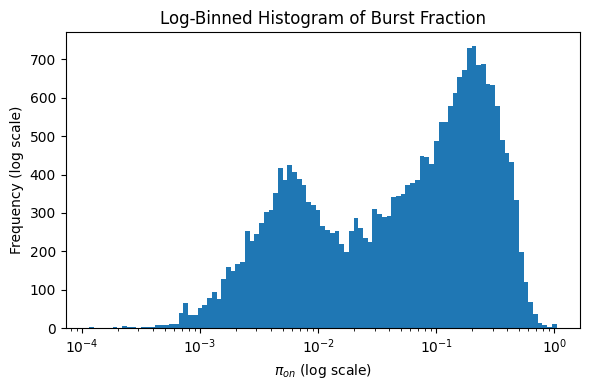

In [38]:
values = k_on_off_ratio
values = values[values > 0]

# Define log-spaced bins
n_bins = 100
min_val = values.min()
max_val = values.max()
log_bins = np.logspace(np.log10(min_val), np.log10(max_val), n_bins)

# Plot
plt.figure(figsize=(6, 4))
plt.hist(values, bins=log_bins)
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r"$\pi_{on}$ (log scale)")
plt.ylabel("Frequency (log scale)")
plt.title("Log-Binned Histogram of Burst Fraction")
plt.tight_layout()
plt.show()

## $k_{off}$

Data source:

- Larsson et al, 2019
- Halpern et al, 2015


In [ ]:
halpern = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/halpern2015bursty_supp_table.xlsx")
halpern = halpern.dropna()
halpern
k_off = halpern['Koff(1/hr)']
print("Halpern")
print("Mean:", k_off.mean())
print("1st Quartile:", k_off.quantile(0.25))
print("Median:", k_off.median())
print("3rd Quartile:", k_off.quantile(0.75))
print("Standard Deviation:", k_off.std())
print("Minimum:", k_off.min())
print("Maximum:", k_off.max())
k_off_halpern = k_off

In [6]:
# # Supplementary Table 1 Transcriptional burst kinetics inferred in Fibroblasts for C57Bl6 and CAST alleles. 

# larsson_2019_supp_table_1 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/larsson2019genomic_supp_table_1.xlsx", sheet_name=None)
# larsson_2019_supp_table_1_c57b16 = larsson_2019_supp_table_1['C57']
# larsson_2019_supp_table_1_c57b16.index = larsson_2019_supp_table_1_c57b16['Gene']
# larsson_2019_supp_table_1_c57b16['kOn'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['kOn'], errors='coerce')
# larsson_2019_supp_table_1_c57b16['kOff'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['Koff'], errors='coerce')
# larsson_2019_supp_table_1_c57b16['ksyn'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['ksyn'], errors='coerce')
# k_off_relative = larsson_2019_supp_table_1_c57b16[(larsson_2019_supp_table_1_c57b16['kOff'] > 2*1e-3) & (larsson_2019_supp_table_1_c57b16['kOff'] < (1e3 - 1))]['kOff'].dropna()
# decay_ES = get_decay_es(larsson_2019_supp_table_1_c57b16.index)
# k_off = (k_off_relative*decay_ES).dropna()
# print("C57 ALLELE")
# print("Mean:", k_off.mean())
# print("1st Quartile:", k_off.quantile(0.25))
# print("Median:", k_off.median())
# print("3rd Quartile:", k_off.quantile(0.75))
# print("Standard Deviation:", k_off.std())
# print("Minimum:", k_off.min())
# print("Maximum:", k_off.max())
# k_off_larsson_Fib_c57b16 = k_off

# larsson_2019_supp_table_1_cast = larsson_2019_supp_table_1['CAST']
# larsson_2019_supp_table_1_cast.index = larsson_2019_supp_table_1_cast['Gene']
# larsson_2019_supp_table_1_cast['kOn'] = pd.to_numeric(larsson_2019_supp_table_1_cast['kOn'], errors='coerce')
# larsson_2019_supp_table_1_cast['kOff'] = pd.to_numeric(larsson_2019_supp_table_1_cast['Koff'], errors='coerce')
# larsson_2019_supp_table_1_cast['ksyn'] = pd.to_numeric(larsson_2019_supp_table_1_cast['ksyn'], errors='coerce')
# k_off_relative = larsson_2019_supp_table_1_cast[(larsson_2019_supp_table_1_cast['kOff'] > 2*1e-3) & (larsson_2019_supp_table_1_cast['kOff'] < (1e3 - 1))]['kOff'].dropna()
# decay_ES = get_decay_es(larsson_2019_supp_table_1_cast.index)
# k_off = (k_off_relative*decay_ES).dropna()
# print("CAST ALLELE")
# print("Mean:", k_off.mean())
# print("1st Quartile:", k_off.quantile(0.25))
# print("Median:", k_off.median())
# print("3rd Quartile:", k_off.quantile(0.75))
# print("Standard Deviation:", k_off.std())
# print("Minimum:", k_off.min())
# print("Maximum:", k_off.max())
# k_off_larsson_Fib_cast = k_off

larsson_2019_supp_table_1_c57b16['on_off_ratio'] = larsson_2019_supp_table_1_c57b16['kOn']/larsson_2019_supp_table_1_c57b16['kOff']
k_on_off_ratio = larsson_2019_supp_table_1_c57b16['on_off_ratio'].dropna()
print("Mean:", k_on_off_ratio.mean())
print("1st Quartile:", k_on_off_ratio.quantile(0.25))
print("Median:", k_on_off_ratio.median())
print("3rd Quartile:", k_on_off_ratio.quantile(0.75))
print("Standard Deviation:", k_on_off_ratio.std())
print("Minimum:", k_on_off_ratio.min())
print("Maximum:", k_on_off_ratio.max())


Mean: 0.10023770330418881
1st Quartile: 0.006089742591473485
Median: 0.03315844845025037
3rd Quartile: 0.13731833145130126
Standard Deviation: 0.39777185820682737
Minimum: 0.0001512976031956788
Maximum: 22.696212351753907


In [ ]:
#Supplementary Table 3 Transcriptional burst kinetics inferred in Embryonic stem cells for C57Bl6 and CAST alleles
larsson_2019_supp_table_3 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/larsson2019genomic_supp_table_3.xlsx", sheet_name=None)
larsson_2019_supp_table_3_c57b16 = larsson_2019_supp_table_3['C57']
larsson_2019_supp_table_3_c57b16.set_index('Gene', inplace=True)
larsson_2019_supp_table_3_c57b16['kOn'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['kOn'], errors='coerce')
larsson_2019_supp_table_3_c57b16['kOff'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['kOff'], errors='coerce')
larsson_2019_supp_table_3_c57b16['ksyn'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['ksyn'], errors='coerce')
k_off_relative = larsson_2019_supp_table_3_c57b16[(larsson_2019_supp_table_3_c57b16['kOff'] > 2*1e-3) & (larsson_2019_supp_table_3_c57b16['kOff'] < (1e3 - 1))]['kOff'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_3_c57b16.index)
k_off = (k_off_relative*decay_ES).dropna()
print("C57 ALLELE")
print("Mean:", k_off.mean())
print("1st Quartile:", k_off.quantile(0.25))
print("Median:", k_off.median())
print("3rd Quartile:", k_off.quantile(0.75))
print("Standard Deviation:", k_off.std())
print("Minimum:", k_off.min())
print("Maximum:", k_off.max())
k_off_larsson_ES_c57b16 = k_off

larsson_2019_supp_table_3_cast = larsson_2019_supp_table_3['CAST']
larsson_2019_supp_table_3_cast.set_index('Gene', inplace=True)
larsson_2019_supp_table_3_cast['kOn'] = pd.to_numeric(larsson_2019_supp_table_3_cast['kOn'], errors='coerce')
larsson_2019_supp_table_3_cast['kOff'] = pd.to_numeric(larsson_2019_supp_table_3_cast['kOff'], errors='coerce')
larsson_2019_supp_table_3_cast['ksyn'] = pd.to_numeric(larsson_2019_supp_table_3_cast['ksyn'], errors='coerce')
k_off_relative = larsson_2019_supp_table_3_cast[(larsson_2019_supp_table_3_cast['kOff'] > 2*1e-3) & (larsson_2019_supp_table_3_cast['kOff'] < (1e3 - 1))]['kOff'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_3_c57b16.index)
k_off = (k_off_relative*decay_ES).dropna()
print("CAST ALLELE")
print("Mean:", k_off.mean())
print("1st Quartile:", k_off.quantile(0.25))
print("Median:", k_off.median())
print("3rd Quartile:", k_off.quantile(0.75))
print("Standard Deviation:", k_off.std())
print("Minimum:", k_off.min())
print("Maximum:", k_off.max())
k_off_larsson_ES_cast = k_off

In [ ]:
#Merge the all the lists to calculate the combined stats
k_off = pd.concat([k_off_halpern, k_off_larsson_Fib_cast, k_off_larsson_Fib_c57b16, k_off_larsson_ES_cast, k_off_larsson_ES_c57b16], ignore_index=True)
print("Mean:", k_off.mean())
print("5th percentile:", k_off.quantile(0.05))
print("1st Quartile:", k_off.quantile(0.25))
print("Median:", k_off.median())
print("3rd Quartile:", k_off.quantile(0.75))
print("95th percentile:", k_off.quantile(0.95))
print("Standard Deviation:", k_off.std())
print("Minimum:", k_off.min())
print("Maximum:", k_off.max())

In [ ]:
import numpy as np

# Define logarithmic bins
bins = np.logspace(np.log10(k_off.min()), np.log10(k_off.max()), 100)

# Plot histogram
plt.hist(k_off, bins=bins)
plt.xscale('log')
plt.show()

## mRNA production rate

Data source:

- Hausser et al 2019
- Schwanhausser et al 2011
- Larsson et al, 2019
- Halpern et al, 2015


In [57]:
hauser_prod_m = pd.read_excel('/home/mzo5929/Keerthana/grnInference/parameter_data/hausser2019central.ods', 'H__sapiens_rates')
hauser_prod_m = hauser_prod_m.dropna()
k_syn_mRNA = hauser_prod_m['mRNA/h']
print("Mean:", k_syn_mRNA.mean())
print("1st Quartile:", k_syn_mRNA.quantile(0.25))
print("Median:", k_syn_mRNA.median())
print("3rd Quartile:", k_syn_mRNA.quantile(0.75))
print("Standard Deviation:", k_syn_mRNA.std())
print("Minimum:", k_syn_mRNA.min())
print("Maximum:", k_syn_mRNA.max())
k_syn_mRNA_hauser = k_syn_mRNA

Mean: 1.5900224938916907
1st Quartile: 0.3621236921704073
Median: 0.731865584320867
3rd Quartile: 1.5567303452237757
Standard Deviation: 3.6979052446592164
Minimum: 0.016568613609091048
Maximum: 117.51217943018719


In [58]:
schwan_prod_m = pd.read_excel('/home/mzo5929/Keerthana/grnInference/parameter_data/schwanhäusser2011global_supp_table_3.xls')
schwan_prod_m =  schwan_prod_m.dropna()
k_syn_mRNA = schwan_prod_m['transcription rate (vsr) experiment [molecules/(cell*h)]']
print("Mean:", k_syn_mRNA.mean())
print("1st Quartile:", k_syn_mRNA.quantile(0.25))
print("Median:", k_syn_mRNA.median())
print("3rd Quartile:", k_syn_mRNA.quantile(0.75))
print("Standard Deviation:", k_syn_mRNA.std())
print("Minimum:", k_syn_mRNA.min())
print("Maximum:", k_syn_mRNA.max())
k_syn_mRNA_schwan_1 = k_syn_mRNA

k_syn_mRNA = schwan_prod_m['transcription rate (vsr) replicate [molecules/(cell*h)]']
print("Mean:", k_syn_mRNA.mean())
print("1st Quartile:", k_syn_mRNA.quantile(0.25))
print("Median:", k_syn_mRNA.median())
print("3rd Quartile:", k_syn_mRNA.quantile(0.75))
print("Standard Deviation:", k_syn_mRNA.std())
print("Minimum:", k_syn_mRNA.min())
print("Maximum:", k_syn_mRNA.max())
k_syn_mRNA_schwan_2 = k_syn_mRNA

Mean: 4.146621853546911
1st Quartile: 1.15
Median: 2.07
3rd Quartile: 3.88
Standard Deviation: 13.315582084109296
Minimum: 0.08
Maximum: 571.92
Mean: 3.507431350114417
1st Quartile: 0.98
Median: 1.78
3rd Quartile: 3.31
Standard Deviation: 13.172891287552766
Minimum: 0.07
Maximum: 651.73


In [59]:
# Supplementary Table 1 Transcriptional burst kinetics inferred in Fibroblasts for C57Bl6 and CAST alleles. 

larsson_2019_supp_table_1 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/larsson2019genomic_supp_table_1.xlsx", sheet_name=None)
larsson_2019_supp_table_1_c57b16 = larsson_2019_supp_table_1['C57']
larsson_2019_supp_table_1_c57b16.index = larsson_2019_supp_table_1_c57b16['Gene']
larsson_2019_supp_table_1_c57b16['kOn'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['kOn'], errors='coerce')
larsson_2019_supp_table_1_c57b16['kOff'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['Koff'], errors='coerce')
larsson_2019_supp_table_1_c57b16['kSyn'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['ksyn'], errors='coerce')
kSyn_relative = larsson_2019_supp_table_1_c57b16[(larsson_2019_supp_table_1_c57b16['kSyn'] > 1)]['kSyn'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_1_c57b16.index)
kSyn = (kSyn_relative*decay_ES).dropna()
print("C57 ALLELE")
print("Mean:", kSyn.mean())
print("1st Quartile:", kSyn.quantile(0.25))
print("Median:", kSyn.median())
print("3rd Quartile:", kSyn.quantile(0.75))
print("Standard Deviation:", kSyn.std())
print("Minimum:", kSyn.min())
print("Maximum:", kSyn.max())
kSyn_larsson_Fib_c57b16 = kSyn

larsson_2019_supp_table_1_cast = larsson_2019_supp_table_1['CAST']
larsson_2019_supp_table_1_cast.index = larsson_2019_supp_table_1_cast['Gene']
larsson_2019_supp_table_1_cast['kOn'] = pd.to_numeric(larsson_2019_supp_table_1_cast['kOn'], errors='coerce')
larsson_2019_supp_table_1_cast['kOff'] = pd.to_numeric(larsson_2019_supp_table_1_cast['Koff'], errors='coerce')
larsson_2019_supp_table_1_cast['kSyn'] = pd.to_numeric(larsson_2019_supp_table_1_cast['ksyn'], errors='coerce')
kSyn_relative = larsson_2019_supp_table_1_cast[(larsson_2019_supp_table_1_cast['kSyn'] > 1) ]['kOff'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_1_cast.index)
kSyn = (kSyn_relative*decay_ES).dropna()
print("CAST ALLELE")
print("Mean:", kSyn.mean())
print("1st Quartile:", kSyn.quantile(0.25))
print("Median:", kSyn.median())
print("3rd Quartile:", kSyn.quantile(0.75))
print("Standard Deviation:", kSyn.std())
print("Minimum:", kSyn.min())
print("Maximum:", kSyn.max())
kSyn_larsson_Fib_cast = kSyn

C57 ALLELE
Mean: 43.52752233644856
1st Quartile: 2.405940433099181
Median: 8.766719996802166
3rd Quartile: 42.93261451233543
Standard Deviation: 101.50850868333107
Minimum: 0.08467314616502365
Maximum: 1811.473988062271
CAST ALLELE
Mean: 14.141586491991884
1st Quartile: 0.41751385884275094
Median: 1.8433326091467346
3rd Quartile: 17.034755395993237
Standard Deviation: 28.80028362274809
Minimum: 0.0014490302964366027
Maximum: 391.24652852939187


In [60]:
#Supplementary Table 3 Transcriptional burst kinetics inferred in Embryonic stem cells for C57Bl6 and CAST alleles
larsson_2019_supp_table_3 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/larsson2019genomic_supp_table_3.xlsx", sheet_name=None)
larsson_2019_supp_table_3_c57b16 = larsson_2019_supp_table_3['C57']
larsson_2019_supp_table_3_c57b16.set_index('Gene', inplace=True)
larsson_2019_supp_table_3_c57b16['kOn'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['kOn'], errors='coerce')
larsson_2019_supp_table_3_c57b16['kOff'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['kOff'], errors='coerce')
larsson_2019_supp_table_3_c57b16['kSyn'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['ksyn'], errors='coerce')
kSyn_relative = larsson_2019_supp_table_3_c57b16[(larsson_2019_supp_table_3_c57b16['kSyn'] > 1)]['kSyn'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_3_c57b16.index)
kSyn = (kSyn_relative*decay_ES).dropna()
print("C57 ALLELE")
print("Mean:", kSyn.mean())
print("1st Quartile:", kSyn.quantile(0.25))
print("Median:", kSyn.median())
print("3rd Quartile:", kSyn.quantile(0.75))
print("Standard Deviation:", kSyn.std())
print("Minimum:", kSyn.min())
print("Maximum:", kSyn.max())
kSyn_larsson_ES_c57b16 = kSyn

larsson_2019_supp_table_3_cast = larsson_2019_supp_table_3['CAST']
larsson_2019_supp_table_3_cast.set_index('Gene', inplace=True)
larsson_2019_supp_table_3_cast['kOn'] = pd.to_numeric(larsson_2019_supp_table_3_cast['kOn'], errors='coerce')
larsson_2019_supp_table_3_cast['kOff'] = pd.to_numeric(larsson_2019_supp_table_3_cast['kOff'], errors='coerce')
larsson_2019_supp_table_3_cast['kSyn'] = pd.to_numeric(larsson_2019_supp_table_3_cast['ksyn'], errors='coerce')
kSyn_relative = larsson_2019_supp_table_3_cast[(larsson_2019_supp_table_3_cast['kSyn'] > 1)]['kSyn'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_3_c57b16.index)
kSyn = (kSyn_relative*decay_ES).dropna()
print("CAST ALLELE")
print("Mean:", kSyn.mean())
print("1st Quartile:", kSyn.quantile(0.25))
print("Median:", kSyn.median())
print("3rd Quartile:", kSyn.quantile(0.75))
print("Standard Deviation:", kSyn.std())
print("Minimum:", kSyn.min())
print("Maximum:", kSyn.max())
kSyn_larsson_ES_cast = kSyn

C57 ALLELE
Mean: 17.119561989988256
1st Quartile: 1.241830252917722
Median: 2.5615520772774274
3rd Quartile: 8.730990937087626
Standard Deviation: 55.551706724159004
Minimum: 0.07928329642780627
Maximum: 1737.3605811558798
CAST ALLELE
Mean: 18.779983765639955
1st Quartile: 1.1960150546665667
Median: 2.377674318502197
3rd Quartile: 6.776839132236907
Standard Deviation: 187.3579508823569
Minimum: 0.13704156464186898
Maximum: 10079.59680180326


In [61]:
halpern = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/halpern2015bursty_supp_table.xlsx")
halpern = halpern.dropna()
halpern
k_syn = halpern['µ(mRNA/hr)']
print("Halpern")
print("Mean:", k_syn.mean())
print("1st Quartile:", k_syn.quantile(0.25))
print("Median:", k_syn.median())
print("3rd Quartile:", k_syn.quantile(0.75))
print("Standard Deviation:", k_syn.std())
print("Minimum:", k_syn.min())
print("Maximum:", k_syn.max())
k_syn_halpern = k_syn

Halpern
Mean: 236.2695466722518
1st Quartile: 73.51715024618431
Median: 145.53947286866213
3rd Quartile: 385.0889958726889
Standard Deviation: 207.2770047240166
Minimum: 1.7130540809349162
Maximum: 703.4073140268565


In [62]:
#Merge the all the lists to calculate the combined stats
kSyn = pd.concat([k_syn_mRNA_hauser, k_syn_mRNA_schwan_2, k_syn_mRNA_schwan_1, k_syn_halpern, kSyn_larsson_Fib_cast, kSyn_larsson_Fib_c57b16, kSyn_larsson_ES_c57b16, kSyn_larsson_ES_cast], ignore_index=True)
print("Mean:", kSyn.mean())
print("5th percentile:", kSyn.quantile(0.05))
print("1st Quartile:", kSyn.quantile(0.25))
print("Median:", kSyn.median())
print("3rd Quartile:", kSyn.quantile(0.75))
print("95th percentile:", kSyn.quantile(0.95))
print("Standard Deviation:", kSyn.std())
print("Minimum:", kSyn.min())
print("Maximum:", kSyn.max())

Mean: 12.680953949877852
5th percentile: 0.21167892608836905
1st Quartile: 0.7281443177464193
Median: 1.7305852886951874
3rd Quartile: 4.877530803765224
95th percentile: 57.969081890244844
Standard Deviation: 75.43996137150044
Minimum: 0.0014490302964366027
Maximum: 10079.59680180326


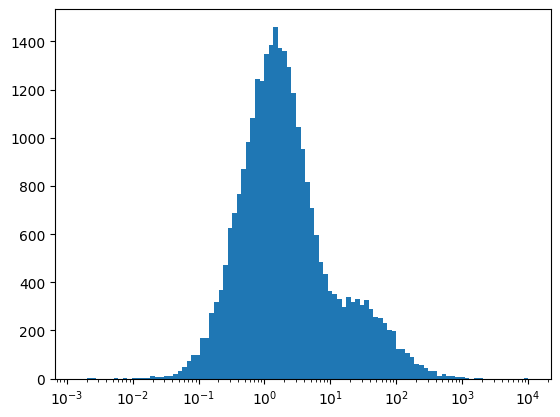

In [63]:
import numpy as np

# Define logarithmic bins
bins = np.logspace(np.log10(kSyn.min()), np.log10(kSyn.max()), 100)

# Plot histogram
plt.hist(kSyn, bins=bins)
plt.xscale('log')
plt.show()

## Protein production rate

Data source:

- Hausser et al 2019
- Schwanhausser et al 2011


In [64]:
hauser_prod_m = pd.read_excel('/home/mzo5929/Keerthana/grnInference/parameter_data/hausser2019central.ods', 'H__sapiens_rates')
hauser_prod_m = hauser_prod_m.dropna()
prod_prot = hauser_prod_m['protein/h']
print("Mean:", prod_prot.mean())
print("1st Quartile:", prod_prot.quantile(0.25))
print("Median:", prod_prot.median())
print("3rd Quartile:", prod_prot.quantile(0.75))
print("Standard Deviation:", prod_prot.std())
print("Minimum:", prod_prot.min())
print("Maximum:", prod_prot.max())
prod_prot_hauser = prod_prot

Mean: 1369.2222770774622
1st Quartile: 627.7523519193219
Median: 1058.8354543427658
3rd Quartile: 1657.7334293264437
Standard Deviation: 3156.6506631935385
Minimum: 19.232864319042267
Maximum: 168205.92564997508


In [65]:
schwan_prod_m = pd.read_excel('/home/mzo5929/Keerthana/grnInference/parameter_data/schwanhäusser2011global_supp_table_3.xls')
schwan_prod_m =  schwan_prod_m.dropna()
prot_prod = schwan_prod_m['translation rate constant (ksp) experiment [molecules/(mRNA*h)]']
print("Mean:", prot_prod.mean())
print("1st Quartile:", prot_prod.quantile(0.25))
print("Median:", prot_prod.median())
print("3rd Quartile:", prot_prod.quantile(0.75))
print("Standard Deviation:", prot_prod.std())
print("Minimum:", prot_prod.min())
print("Maximum:", prot_prod.max())
prot_prod_schwan_1 = prot_prod

prot_prod = schwan_prod_m['translation rate constant (ksp) replicate [molecules/(mRNA*h)]']
print("Mean:", prot_prod.mean())

print("1st Quartile:", prot_prod.quantile(0.25))
print("Median:", prot_prod.median())
print("3rd Quartile:", prot_prod.quantile(0.75))

print("Standard Deviation:", prot_prod.std())
print("Minimum:", prot_prod.min())
print("Maximum:", prot_prod.max())
prot_prod_schwan_2 = prot_prod

Mean: 551.7847540045766
1st Quartile: 61.3975
Median: 166.97
3rd Quartile: 385.7975
Standard Deviation: 5973.56472626392
Minimum: 0.19
Maximum: 254666.99
Mean: 441.5190389016018
1st Quartile: 40.605000000000004
Median: 128.71
3rd Quartile: 343.295
Standard Deviation: 3905.956754668903
Minimum: 0.1
Maximum: 197957.19


In [66]:
#Merge the all the lists to calculate the combined stats
kSyn_protein = pd.concat([prot_prod_schwan_2, prot_prod_schwan_1, prod_prot_hauser], ignore_index=True)
print("Mean:", kSyn_protein.mean())
print("5th percentile:", kSyn_protein.quantile(0.05))
print("1st Quartile:", kSyn_protein.quantile(0.25))
print("Median:", kSyn_protein.median())
print("3rd Quartile:", kSyn_protein.quantile(0.75))
print("95th percentile:", kSyn_protein.quantile(0.95))
print("Standard Deviation:", kSyn_protein.std())
print("Minimum:", kSyn_protein.min())
print("Maximum:", kSyn_protein.max())

Mean: 974.1045967895525
5th percentile: 19.4
1st Quartile: 167.55
Median: 558.0020905949287
3rd Quartile: 1209.8987637455139
95th percentile: 2663.7287298510328
Standard Deviation: 4144.0154727637155
Minimum: 0.1
Maximum: 254666.99


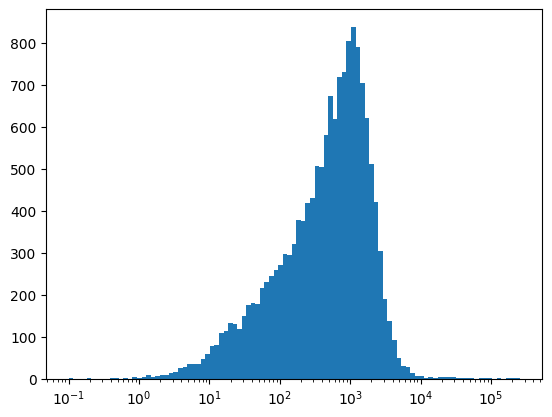

In [67]:
import numpy as np

# Define logarithmic bins
bins = np.logspace(np.log10(kSyn_protein.min()), np.log10(kSyn_protein.max()), 100)

# Plot histogram
plt.hist(kSyn_protein, bins=bins)
plt.xscale('log')
plt.show()

## mRNA half-life

Data source:

- Hausser et al 2019
- Schwanhausser et al 2011
- Herzog et al, 2017
- Friedel et al, 2009
- Halpern et al, 2015
- Slam-seq


In [68]:
schwan_mRNA_half_life = pd.read_excel('/home/mzo5929/Keerthana/grnInference/parameter_data/schwanhäusser2011global_supp_table_3.xls')
schwan_mRNA_half_life =  schwan_mRNA_half_life.dropna()
schwan_mRNA_half_life
mRNA_half_life = schwan_mRNA_half_life['mRNA half-life experiment [h]']
print("Mean:", mRNA_half_life.mean())
print("1st Quartile:", mRNA_half_life.quantile(0.25))
print("Median:", mRNA_half_life.median())
print("3rd Quartile:", mRNA_half_life.quantile(0.75))
print("Standard Deviation:", mRNA_half_life.std())
print("Minimum:", mRNA_half_life.min())
print("Maximum:", mRNA_half_life.max())
mRNA_half_life_schwan_1 = mRNA_half_life

mRNA_half_life = schwan_mRNA_half_life['mRNA half-life replicate [h]']
print("Mean:", mRNA_half_life.mean())
print("1st Quartile:", mRNA_half_life.quantile(0.25))
print("Median:", mRNA_half_life.median())
print("3rd Quartile:", mRNA_half_life.quantile(0.75))
print("Standard Deviation:", mRNA_half_life.std())
print("Minimum:", mRNA_half_life.min())
print("Maximum:", mRNA_half_life.max())
mRNA_half_life_schwan_2 = mRNA_half_life

Mean: 9.959902745995423
1st Quartile: 6.91
Median: 9.245000000000001
3rd Quartile: 12.3225
Standard Deviation: 4.187333654951837
Minimum: 1.43
Maximum: 29.59
Mean: 12.248884439359268
1st Quartile: 7.6775
Median: 10.8
3rd Quartile: 15.022499999999999
Standard Deviation: 6.790006918133548
Minimum: 1.65
Maximum: 62.27


In [69]:
halpern = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/halpern2015bursty_supp_table.xlsx")
halpern = halpern.dropna()
halpern
k_deg = halpern['δ(1/hr)']
mRNA_half_life = np.log(2)/k_deg
print("Halpern")
print("Mean:", mRNA_half_life.mean())
print("1st Quartile:", mRNA_half_life.quantile(0.25))
print("Median:", mRNA_half_life.median())
print("3rd Quartile:", mRNA_half_life.quantile(0.75))
print("Standard Deviation:", mRNA_half_life.std())
print("Minimum:", mRNA_half_life.min())
print("Maximum:", mRNA_half_life.max())
mRNA_half_life_halpern = mRNA_half_life

Halpern
Mean: 24.401002766849537
1st Quartile: 0.6190142305991742
Median: 3.7897773563181563
3rd Quartile: 16.315964477466245
Standard Deviation: 72.85899478774019
Minimum: 0.2779258943704672
Maximum: 346.5735902799726


In [70]:
herzog = pd.read_excel('/home/mzo5929/Keerthana/grnInference/parameter_data/herzog2017thiol_supp_table_2.xls')
herzog = herzog.dropna()
mRNA_half_life = herzog['Half-life (h)']
print("herzog")
print("Mean:", mRNA_half_life.mean())
print("1st Quartile:", mRNA_half_life.quantile(0.25))
print("Median:", mRNA_half_life.median())
print("3rd Quartile:", mRNA_half_life.quantile(0.75))
print("Standard Deviation:", mRNA_half_life.std())
print("Minimum:", mRNA_half_life.min())
print("Maximum:", mRNA_half_life.max())
mRNA_half_life_herzog = mRNA_half_life

herzog
Mean: 4.259592611070534
1st Quartile: 2.67063158395808
Median: 3.73821555962394
3rd Quartile: 5.14741182373285
Standard Deviation: 2.4147606554131196
Minimum: 0.485781171980553
Maximum: 24.0


In [71]:
friedel = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/friedel2009conserved.xls")
friedel.columns = friedel.iloc[0]
friedel = friedel[1:]
mRNA_half_life = friedel["Half-life [h]"]
print("friedel")
print("Mean:", mRNA_half_life.mean())
print("1st Quartile:", mRNA_half_life.quantile(0.25))
print("Median:", mRNA_half_life.median())
print("3rd Quartile:", mRNA_half_life.quantile(0.75))
print("Standard Deviation:", mRNA_half_life.std())
print("Minimum:", mRNA_half_life.min())
print("Maximum:", mRNA_half_life.max())
mRNA_half_life_friedel = mRNA_half_life



friedel
Mean: 6.36398187787755
1st Quartile: 2.508271949728267
Median: 4.58488558002255
3rd Quartile: 7.876594969465133
Standard Deviation: 6.135177766087061
Minimum: 0.10308591716422867
Maximum: 97.62936701260699


In [73]:
DR_ES = pd.read_csv('/home/mzo5929/Keerthana/grnInference/parameter_data/larsson_slam_seq_data.csv', sep=';')
DR_ES.index = DR_ES['Name']
DR_ES = DR_ES[~DR_ES.index.duplicated(keep='first')]
DR_ES = DR_ES.dropna(how='any')
DR_ES['decay'] = np.log(2)/DR_ES['Half-life (h)']
decay_ES = DR_ES['decay']
decay_ES = decay_ES.replace([np.inf, 0], np.nan).dropna()
decay_ES = decay_ES[~decay_ES.index.duplicated(keep='first')]
decay_ES = decay_ES[decay_ES > 0]
decay_ES = decay_ES.dropna()

mRNA_half_life = np.log(2)/decay_ES
print("slam-seq")
print("Mean:", mRNA_half_life.mean())
print("1st Quartile:", mRNA_half_life.quantile(0.25))
print("Median:", mRNA_half_life.median())
print("3rd Quartile:", mRNA_half_life.quantile(0.75))
print("Standard Deviation:", mRNA_half_life.std())
print("Minimum:", mRNA_half_life.min())
print("Maximum:", mRNA_half_life.max())
mRNA_half_life_slam_seq = mRNA_half_life

slam-seq
Mean: 4.281614662864467
1st Quartile: 2.666909792
Median: 3.736625762
3rd Quartile: 5.162719028
Standard Deviation: 2.4667124446433175
Minimum: 0.485781172
Maximum: 24.0


In [74]:
#Merge the all the lists to calculate the combined stats
mRNA_half_life = pd.concat([mRNA_half_life_friedel, mRNA_half_life_slam_seq, mRNA_half_life_herzog, mRNA_half_life_halpern, mRNA_half_life_schwan_2, mRNA_half_life_schwan_1], ignore_index=True)
print("Mean:", mRNA_half_life.mean())
print("5th percentile:", mRNA_half_life.quantile(0.05))
print("1st Quartile:", mRNA_half_life.quantile(0.25))
print("Median:", mRNA_half_life.median())
print("3rd Quartile:", mRNA_half_life.quantile(0.75))
print("95th percentile:", mRNA_half_life.quantile(0.95))
print("Standard Deviation:", mRNA_half_life.std())
print("Minimum:", mRNA_half_life.min())
print("Maximum:", mRNA_half_life.max())

Mean: 6.618694821328816
5th percentile: 1.508572268
1st Quartile: 3.02187697305508
Median: 4.91
3rd Quartile: 8.52900448481157
95th percentile: 16.94
Standard Deviation: 5.824201168771438
Minimum: 0.10308591716422867
Maximum: 346.5735902799726


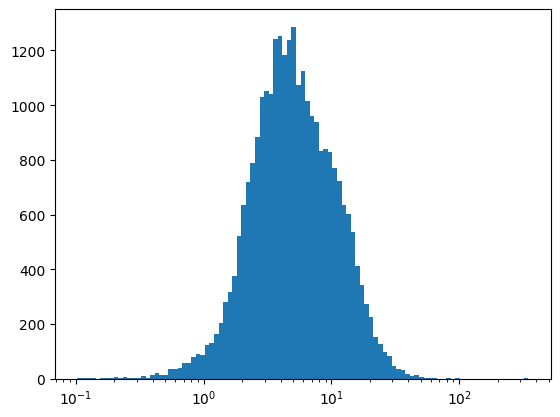

In [75]:
import numpy as np

# Define logarithmic bins
bins = np.logspace(np.log10(mRNA_half_life.min()), np.log10(mRNA_half_life.max()), 100)

# Plot histogram
plt.hist(mRNA_half_life, bins=bins)
plt.xscale('log')
plt.show()

## protein half-life

Data source:

- Eden et al 2011
- Schwanhausser et al 2011


In [76]:
schwan_mRNA_half_life = pd.read_excel('/home/mzo5929/Keerthana/grnInference/parameter_data/schwanhäusser2011global_supp_table_3.xls')
schwan_mRNA_half_life =  schwan_mRNA_half_life.dropna()
schwan_mRNA_half_life
protein_half_life = schwan_mRNA_half_life['Protein half-life experiment [h]']
print("Mean:", protein_half_life.mean())
print("1st Quartile:", protein_half_life.quantile(0.25))
print("Median:", protein_half_life.median())
print("3rd Quartile:", protein_half_life.quantile(0.75))
print("Standard Deviation:", protein_half_life.std())
print("Minimum:", protein_half_life.min())
print("Maximum:", protein_half_life.max())
protein_half_life_schwan_1 = protein_half_life

protein_half_life = schwan_mRNA_half_life['Protein half-life replicate [h]']
print("Mean:", protein_half_life.mean())
print("1st Quartile:", protein_half_life.quantile(0.25))
print("Median:", protein_half_life.median())
print("3rd Quartile:", protein_half_life.quantile(0.75))
print("Standard Deviation:", protein_half_life.std())
print("Minimum:", protein_half_life.min())
print("Maximum:", protein_half_life.max())
protein_half_life_schwan_2 = protein_half_life

Mean: 56.83778890160183
1st Quartile: 24.66
Median: 44.95
3rd Quartile: 75.69
Standard Deviation: 45.83951015589958
Minimum: 0.55
Maximum: 295.28
Mean: 105.90046624713959
1st Quartile: 24.36
Median: 48.31
3rd Quartile: 90.7675
Standard Deviation: 648.0637622943186
Minimum: 0.44
Maximum: 34357.0


In [77]:
eden_protein_half_life = pd.read_excel('/home/mzo5929/Keerthana/grnInference/parameter_data/eden2011proteome_excel.xlsx')
# eden_protein_half_life =  eden_protein_half_life.dropna()
eden_protein_half_life
protein_half_life = eden_protein_half_life['Protein Half-life (1/hr)']
print("Mean:", protein_half_life.mean())
print("1st Quartile:", protein_half_life.quantile(0.25))
print("Median:", protein_half_life.median())
print("3rd Quartile:", protein_half_life.quantile(0.75))
print("Standard Deviation:", protein_half_life.std())
print("Minimum:", protein_half_life.min())
print("Maximum:", protein_half_life.max())
protein_half_life_eden = protein_half_life

Mean: 8.939
1st Quartile: 5.574999999999999
Median: 8.2
3rd Quartile: 11.1
Standard Deviation: 4.591139798183525
Minimum: 0.8
Maximum: 22.5


In [78]:
#Merge the all the lists to calculate the combined stats
protein_half_life = pd.concat([protein_half_life_eden, protein_half_life_schwan_2, protein_half_life_schwan_1], ignore_index=True)
print("Mean:", protein_half_life.mean())
print("5th percentile:", protein_half_life.quantile(0.05))
print("1st Quartile:", protein_half_life.quantile(0.25))
print("Median:", protein_half_life.median())
print("3rd Quartile:", protein_half_life.quantile(0.75))
print("9th percentile:", protein_half_life.quantile(0.95))
print("Standard Deviation:", protein_half_life.std())
print("Minimum:", protein_half_life.min())
print("Maximum:", protein_half_life.max())


Mean: 80.34783417935702
5th percentile: 7.89
1st Quartile: 23.7575
Median: 45.56
3rd Quartile: 81.3575
9th percentile: 196.25599999999986
Standard Deviation: 456.84196851441567
Minimum: 0.44
Maximum: 34357.0


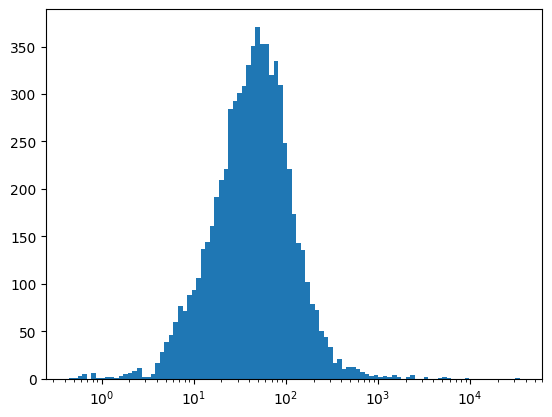

In [79]:
import numpy as np

# Define logarithmic bins
bins = np.logspace(np.log10(protein_half_life.min()), np.log10(protein_half_life.max()), 100)

# Plot histogram
plt.hist(protein_half_life, bins=bins)
plt.xscale('log')
plt.show()

In [ ]:
plt.hist(protein_half_life[protein_half_life < 1000], bins = 30)

# Parameter generation


In [2]:
from scipy.stats import qmc
import pandas as pd
import numpy as np

In [ ]:
# --- Define parameters ---
gene_params = [
    "p_on", "p_off", "mrna_half_life", "protein_half_life",
    "p_prod_protein", "p_prod_mRNA"
]
interaction_params = ["n_gene_1_to_gene_2", "p_add_gene_1_to_gene_2", "n_gene_2_to_gene_1", "p_add_gene_2_to_gene_1"]

param_names = (
    [f"{p}_gene_1" for p in gene_params] +
    [f"{p}_gene_2" for p in gene_params] +
    interaction_params
)

param_bounds = {
    "p_on": (0.01, 3),
    "p_off": (0.05, 60),
    "mrna_half_life": (1, 20),
    "protein_half_life": (5, 200),
    "p_prod_mRNA": (0.2, 60),
    "p_prod_protein": (15, 2700),
    "n_gene_1_to_gene_2": (0.1, 5),
    "n_gene_2_to_gene_1": (0.1, 5),
    "p_add_gene_1_to_gene_2": (2, 10),
    "p_add_gene_2_to_gene_1": (2, 10),
}

bounds = (
    [param_bounds[p] for p in gene_params] +
    [param_bounds[p] for p in gene_params] +
    [param_bounds[p] for p in interaction_params]
)

# --- Constraint function ---
def hl_to_deg(hl):
    return np.log(2) / hl


# --- Sampling ---
n_valid_required = 25000
oversample_factor = 1
n_attempts = int(n_valid_required * oversample_factor)
seed = 42

# Latin Hypercube Sampling
# Convert bounds to log10 space
log_bounds_lower = [np.log10(b[0]) for b in bounds]
log_bounds_upper = [np.log10(b[1]) for b in bounds]

# Latin Hypercube Sampling in log space
sampler = qmc.LatinHypercube(d=len(bounds), seed=seed)
sample = sampler.random(n=n_attempts)

# Scale sample in log space
scaled_log_sample = qmc.scale(sample, log_bounds_lower, log_bounds_upper)

# Convert back to linear space
scaled_samples = 10 ** scaled_log_sample

# Create DataFrame
df = pd.DataFrame(scaled_samples, columns=param_names)


# Filter valid samples
df_valid = df #[valid_mask]

# --- Print acceptance stats ---
print(f"Generated {n_attempts} samples")

# Ensure enough valid samples
if len(df_valid) < n_valid_required:
    raise ValueError(f"Only {len(df_valid)} valid samples found. Increase oversample_factor or relax constraint.")

# Keep only first 25,000 valid
df_valid = df_valid.iloc[:n_valid_required].reset_index(drop=True)

import matplotlib.pyplot as plt

# Plot histograms of all parameters in df_valid
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df_valid.columns):
    axes[i].hist(np.log10(df_valid[col]), bins=100, color='gray', edgecolor='black')
    axes[i].set_title(f"log10({col})")
    axes[i].set_ylabel("Frequency")
    axes[i].set_xlabel("log10(Value)")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


# --- Expand to long format ---
rows = []
for idx, row in df_valid.iterrows():
    g1 = {k.replace("_gene_1", ""): v for k, v in row.items() if "_gene_1" in k and "_gene_2" not in k}
    g2 = {k.replace("_gene_2", ""): v for k, v in row.items() if "_gene_2" in k and "_gene_1" not in k}
    interaction = {k: v for k, v in row.items() if "gene_1_to_gene_2" in k}
    interaction_2 = {k: v for k, v in row.items() if "gene_2_to_gene_1" in k}
    rows.append({**g1, **interaction, **interaction_2, "pair_id": idx, "gene_id": 1})
    rows.append({**g2, **interaction, **interaction_2, "pair_id": idx, "gene_id": 2})

final_df = pd.DataFrame(rows).reset_index(drop=True)

# --- Save ---
output_path = "/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation/sim_details/lhc_sampled_parameters_bidirectional_positive_reg_2.csv"
final_df.to_csv(output_path, index=True)
print(f"\n✅ Saved to {output_path}")


In [1]:
# param_df = pd.read_csv("/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation/sim_details/lhc_sampled_parameters_negative_reg.csv", index_col = 0)

import numpy as np
import pandas as pd

def hl_to_deg(hl):
    """Convert half-life to degradation rate."""
    return np.log(2) / hl

def compute_steady_state_levels(param_df, gene_id):
    """Compute mean mRNA and protein levels for gene_id (1 or 2), assuming hill = 0.5."""
    assert gene_id in [1, 2], "gene_id must be 1 or 2"

    # Basic parameters
    p_on = param_df["p_on"]
    p_off = param_df["p_off"]
    prod_m = param_df["p_prod_mRNA"]
    prod_p = param_df["p_prod_protein"]
    deg_m = hl_to_deg(param_df["mrna_half_life"])
    deg_p = hl_to_deg(param_df["protein_half_life"])

    # Use .get to safely retrieve interaction term or default to 0
    if gene_id == 2:
        p_add = param_df.get("p_add_gene_1_to_gene_2", 0.0)
    else:
        p_add = param_df.get("p_add_gene_2_to_gene_1", 0.0)

    # Compute effective p_on using hill response = 0.5
    p_on_eff = p_on + 0.5 * p_add
    burst_prob = p_on_eff / (p_on_eff + p_off)

    # Steady-state means
    mean_mRNA = burst_prob * prod_m / deg_m
    mean_protein = mean_mRNA * prod_p / deg_p

    # Store results in DataFrame
    param_df["mean_mRNA_level"] = mean_mRNA
    param_df["mean_protein_level"] = mean_protein

    return param_df

# Usage
param_df = pd.read_csv("/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation_run_2/sim_details/lhc_sampled_parameters_positive_reg_2.csv", index_col = 0)
param_df = compute_steady_state_levels(param_df, gene_id=2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filter out zero or negative values (log scale can't handle them)
values = param_df['mean_protein_level']
values = values[values > 0]

# Define log-spaced bins
n_bins = 100
min_val = values.min()
max_val = values.max()
log_bins = np.logspace(np.log10(min_val), np.log10(max_val), n_bins)

# Plot
plt.figure(figsize=(6, 4))
plt.hist(values, bins=log_bins)
plt.xscale('log')
# plt.yscale('log')
plt.xlabel("Mean protein level (log scale)")
plt.ylabel("Frequency (log scale)")
plt.title("Log-Binned Histogram of Mean Protein Levels")
plt.tight_layout()
plt.show()


In [ ]:
param_df[param_df['mean_mRNA_level'] < 100].shape

In [ ]:
plt.hist(param_df[param_df['mean_mRNA_level'] < 1]['mean_mRNA_level'])

## Generate test parameters


In [32]:
import pandas as pd
import numpy as np

# Initial values
gene_1 = [0.55, 8.08, 5, 45, 2, 500, 2, 6, 7, 1]
gene_2 = [0.55, 8.08, 5, 45, 2, 500, 2, 6, 7, 2]

r_add = np.arange(0.1, 1, 0.05)
rows = []

for i, r_add_curr in enumerate(r_add):
    gene_1[7] = r_add_curr
    gene_1[8] = i

    gene_2[7] = r_add_curr
    gene_2[8] = i

    rows.append(gene_1.copy())
    rows.append(gene_2.copy())

# Create DataFrame
df = pd.DataFrame(rows)
df.to_csv("/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation_test/sim_details/effect_of_radd_negative.csv")

